In [1]:
import tensorflow as tf
import numpy as np

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [10]:
x_train, x_test = x_train/255, x_test/255
y_train, y_test = y_train.flatten(), y_test.flatten()

In [5]:
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)

In [11]:
k = len(set(y_train))

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Conv2D(32, (3,3), strides=2, activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3,3), strides=2, activation='relu'))
model.add(tf.keras.layers.Conv2D(128, (3,3), strides=2, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(k, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
1563/1563 [==============================] - 57s 37ms/step - loss: 1.4639 - accuracy: 0.4689 - val_loss: 1.2499 - val_accuracy: 0.5501
Epoch 2/100
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1818 - accuracy: 0.5772 - val_loss: 1.0928 - val_accuracy: 0.6009
Epoch 3/100
1563/1563 [==============================] - 59s 37ms/step - loss: 1.0299 - accuracy: 0.6333 - val_loss: 1.0220 - val_accuracy: 0.6439
Epoch 4/100
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9072 - accuracy: 0.6774 - val_loss: 0.9564 - val_accuracy: 0.6650
Epoch 5/100
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8127 - accuracy: 0.7136 - val_loss: 0.9414 - val_accuracy: 0.6680
Epoch 6/100
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7222 - accuracy: 0.7436 - val_loss: 0.8665 - val_accuracy: 0.6962
Epoch 7/100
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6498 - accuracy: 0.7693 - val_loss: 0

1563/1563 [==============================] - 56s 36ms/step - loss: 0.1525 - accuracy: 0.9524 - val_loss: 1.6908 - val_accuracy: 0.6973
Epoch 57/100
1563/1563 [==============================] - 59s 37ms/step - loss: 0.1477 - accuracy: 0.9547 - val_loss: 1.6639 - val_accuracy: 0.6978
Epoch 58/100
1563/1563 [==============================] - 58s 37ms/step - loss: 0.1545 - accuracy: 0.9522 - val_loss: 1.7604 - val_accuracy: 0.6960
Epoch 59/100
1563/1563 [==============================] - 57s 37ms/step - loss: 0.1495 - accuracy: 0.9537 - val_loss: 1.7149 - val_accuracy: 0.7007
Epoch 60/100
1563/1563 [==============================] - 57s 36ms/step - loss: 0.1500 - accuracy: 0.9538 - val_loss: 1.6392 - val_accuracy: 0.6918
Epoch 61/100
1563/1563 [==============================] - 58s 37ms/step - loss: 0.1508 - accuracy: 0.9536 - val_loss: 1.6727 - val_accuracy: 0.6941
Epoch 62/100
1563/1563 [==============================] - 57s 36ms/step - loss: 0.1445 - accuracy: 0.9556 - val_loss: 1.7348 

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.9838 - accuracy: 0.6967


[1.983824372291565, 0.6966999769210815]

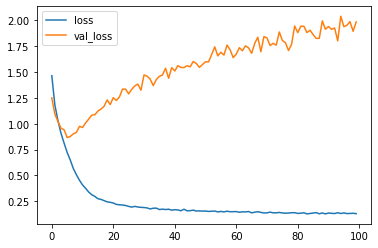

In [17]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

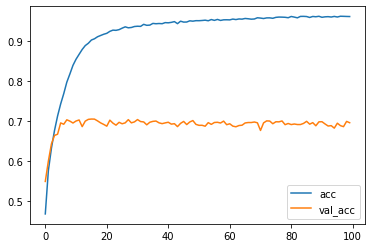

In [18]:
plt.plot(result.history['accuracy'], label='acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[743  30  44  24  24   9   9  17  65  35]
 [  7 840  10  16   3   5  15   4  28  72]
 [ 59   9 557  95  88  61  76  32  17   6]
 [ 21   2  62 529  61 175  75  46  15  14]
 [ 21   3  56  88 637  33  57  84  10  11]
 [ 19   8  48 241  48 540  27  47  12  10]
 [  8   6  36  69  41  32 782  13   9   4]
 [ 12   5  18  60  48  55   8 774   5  15]
 [ 70  42  19  14  10  11   9  11 788  26]
 [ 38  84   9  29   4   8  12  14  25 777]]


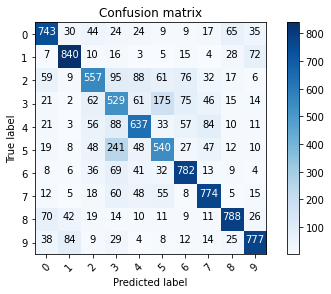

In [19]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [20]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

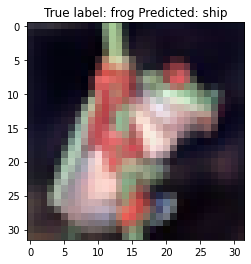

In [24]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1180672   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)             